# Homework 27

Section 14.1

Math 404

Winter 2020

Logan Schelly

In [1]:
import os
import graphviz
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import GridSearchCV, train_test_split

## Exercise 14.1
Use the ``DecisionTreeClassifier`` from ``sklearn.tree`` to build a model that classifies the Titanic dataset.

In [2]:
tdf = pd.read_csv(os.path.join(".", "hw66_data", "train.csv"))
tdf.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [3]:
X = tdf.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
leSex = LabelEncoder() 
X.Sex = leSex.fit_transform(X.Sex)
leEmbarked = LabelEncoder()
X.Embarked.fillna('NaN', inplace=True)
X.Embarked = leEmbarked.fit_transform(X.Embarked)
X.Age.fillna(X.Age.mean(), inplace=True)
y = tdf.Survived
t_clf = DecisionTreeClassifier(max_depth = 4)
t_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Part (i)
Visualize the tree as follows:

a) Use ``sklearn.tree.export_graphviz`` (remember to ``print`` the output) to get the graph in text form.

In [4]:
dot_data = export_graphviz(t_clf, out_file=None,
                        feature_names=X.columns,  
                        class_names=['Death', 'Survival'],  
                        filled=True,  
                        special_characters=True, rotate=True)
print(dot_data)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
rankdir=LR ;
0 [label=<Sex &le; 0.5<br/>gini = 0.473<br/>samples = 891<br/>value = [549, 342]<br/>class = Death>, fillcolor="#f5cfb4"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.383<br/>samples = 314<br/>value = [81, 233]<br/>class = Survival>, fillcolor="#7ebfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;
2 [label=<Age &le; 2.5<br/>gini = 0.1<br/>samples = 170<br/>value = [9, 161]<br/>class = Survival>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<Parch &le; 1.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = Death>, fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<br/>class = Survival>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>class = Death>, fillcolor="#e58139"] ;
3 -> 5 ;
6 [label=<Fare &le; 28.856<br/>gini = 0.091<br/>samples = 168<br/>value = [8, 160]<br/>class = Survival>, fillcolor="#43a2e6"] ;

b) Convert the text to graph with ``webgraphviz.com``.

Alternatively, you can install and use graphviz on your machine with 
```
conda install python-graphviz
```
or
```
pip install graphviz
```
but some students have had trouble installing graphviz on their machines.

Hint: You will need to set a fairly small max depth like 4 or 5 in order to create the visual.

Turn in a printout (screenshot) of your visualization and identify any leaves that look like overfitting.

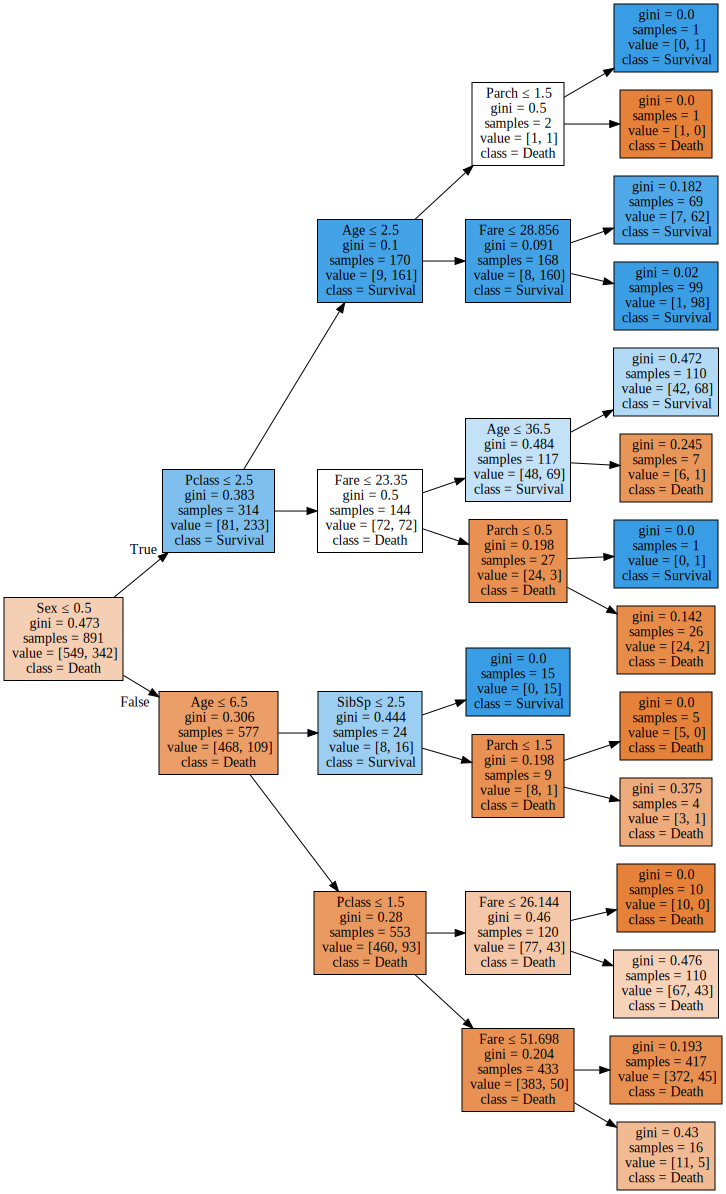

In [5]:
graph = graphviz.Source(dot_data, )
graph

##### The leaves with less than 50 samples look like they're overfitting.

### Part (ii)
Use cross validation to select the best combination of the hyperparameters ``max_depth``, ``min_samples_leaf``, and ``max_leaf_nodes``.  Visualize the resulting tree and turn in a printout of the visualization.

In [6]:
param_grid = {
    'max_depth' : [1, 2, 3, 4],
    'min_samples_leaf' : 2**np.arange(0, 8),
    'max_leaf_nodes' : np.arange(4, 16)
}
gs = GridSearchCV(t_clf, param_grid, cv=5, scoring='accuracy', refit=True)
gs.fit(X, y)
best_tree = gs.best_estimator_
graphviz.Source(export_graphviz(best_tree, out_file=None,
                        feature_names=X.columns,  
                        class_names=['Death', 'Survival'],  
                        filled=True,  
                        special_characters=True, rotate=True))

##### Compare this tree to the one plotted in the previous problem.  Identify any leaves that look like overfitting.

This tree has 1 less level and half as many leaves.

The leaves with less than 30 samples seem like overfitting.

## Exercise 14.2
Using the sklearn ``digits`` dataset...

In [7]:
digits = load_digits()

### Part (i)
Split the data into an 80-20 train-test split.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2)

### Part (ii)
Build a decision tree classifier to classify the digits.

In [9]:
dig_t_clf = DecisionTreeClassifier()

### Part (iii)
Use cross validation on the training data to choose the best combination of the hyperparameters ``max_depth``, ``min_samples_leaf`` and ``max_leaf_nodes``.

In [10]:
param_grid = param_grid = {
    'max_depth' : 2**np.arange(3, 10),
    'min_samples_leaf' : 2**np.arange(3, 10),
    'max_leaf_nodes' : 2**np.arange(3, 10)
}
gs = GridSearchCV(dig_t_clf, param_grid, cv=5, scoring='accuracy', refit=True)
gs.fit(X_train, y_train)

/home/lschelly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([  8,  16,  32,  64, 128, 256, 512]),
                         'max_leaf_nodes': array([  8,

### Part (iv)
Apply the final classifier to the test set.  What is its accuracy (misclassification rate)?

In [11]:
best_dig_t = gs.best_estimator_
y_pred = best_dig_t.predict(X_test)
print("Misclassification rate is", (y_pred != y_test).mean())

Misclassification rate is 0.19722222222222222


### Part (v)
Plot some (at least 10) of the misclassified digits in the test set and their predicted values.

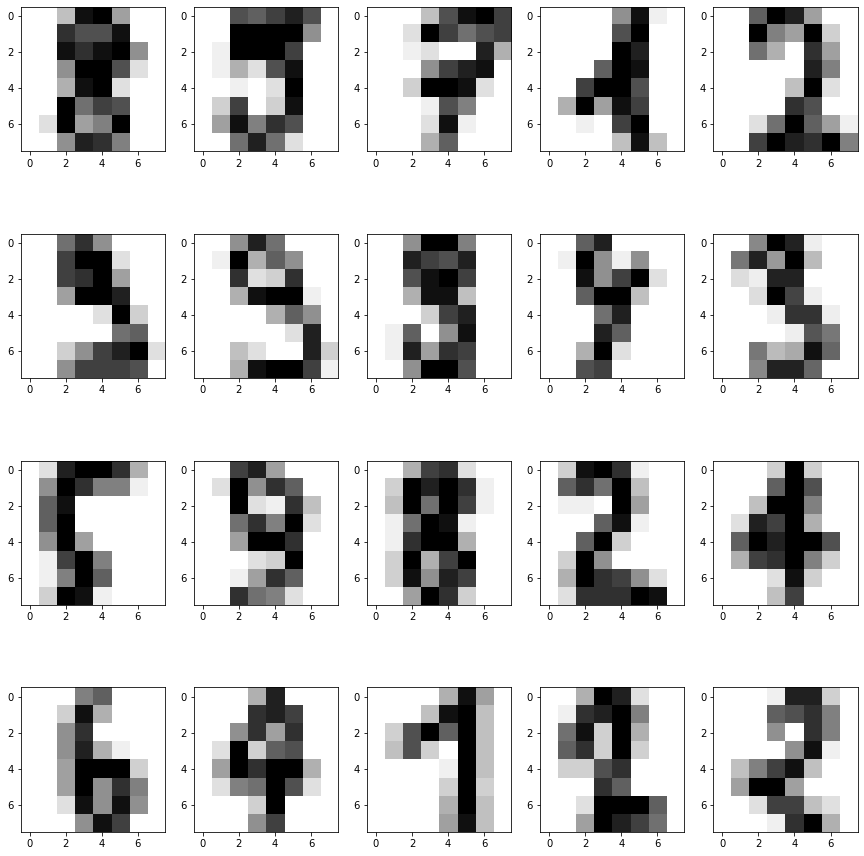

In [12]:
mask = (y_pred != y_test)
wrong_images = X_test[mask]
n_images = 20
ncols = 5
nrows = (n_images + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
for image, ax in zip(wrong_images[:n_images], axes.ravel()):
    im = image.reshape((8,8))
    ax.imshow(-im, cmap='gray')
plt.show()

## Exercise 14.3
Use the ``DecisionTreeRegressor`` from ``sklearn.tree`` to build a tree that predicts housing values in the Boston housing dataset (easily loaded using sklearn).

In [13]:
boston = load_boston()
tree = DecisionTreeRegressor()
boston.data.shape

(506, 13)

### Part (i)
Use cross validation to select the best combination of the hyperparameters ``max_depth``, ``min_samples``, and ``max_leaf_nodes``.

In [14]:
param_grid = {
    'max_depth' : np.arange(1, 5),
    'min_samples_leaf' : 2**np.arange(2, 7),
    'max_leaf_nodes' : 2**np.arange(1, 7)
}
boston_gs = GridSearchCV(tree, param_grid, cv=7)
boston_gs.fit(boston.data, boston.target)
#tree.set_params(**boston_gs.best_params_)

/home/lschelly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'max_leaf_nodes': array([ 2,  4,  8, 16, 32, 64]),
                         'min_samples_leaf': array([ 4,  8, 16, 32, 64])},
  

### Part (ii)
Visualize your final tree.  Identify any leaves that look like overfitting.

In [15]:
graphviz.Source(export_graphviz(boston_gs.best_estimator_, out_file=None,
                        feature_names=boston.feature_names,  
                        filled=True,  
                        special_characters=True, rotate=True))

All the leaves with less than 10 samples look like they're overfitting.